## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №4. Градиентный бустинг ~~своими руками~~

Задание выполнил(а): Целищев Иван

### Общая информация
__Дата выдачи:__ 27.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_04_Фамилия_Имя.ipynb

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('application_train.csv', sep=',', index_col=0)
pd.set_option('display.max_columns', None)
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

In [3]:
data.info(max_cols=121)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 121 columns):
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_POPULATION_RELATIVE      307511 non-null float64


Для удаления сразу я выбрал некоторые столбцы: ELEVATORS_MODE, ELEVATORS_MEDI, FLAG_DOCUMENT_10 - _21 (это кроме Таргета)

In [4]:
data.drop(['ELEVATORS_MODE','ELEVATORS_MEDI'], axis = 1, inplace=True)

In [5]:
data.drop(data.loc[:, 'FLAG_DOCUMENT_10' : 'FLAG_DOCUMENT_21'], axis = 1, inplace=True)

In [6]:
Y = data['TARGET'].copy()
data.drop(['TARGET'], axis = 1, inplace=True)
data.isnull().sum()

NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_T

Заполним пропуски в числовых столбцах значениями медианы этого столбца

In [7]:
for column in data.columns:
    if data[column].dtypes == np.float64 or data[column].dtypes == np.int64:
        data[column].fillna(data[column].median(), inplace = True)

Оставшиеся столбцы с пропусками :

In [8]:
columns = data.columns[np.where(data.isnull().sum() != 0)]
columns

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

Заменим самыми популярными значением для каждого столбца

In [9]:
for c in columns:
    data[c].value_counts()
    d = dict(data[c].value_counts())
    m = max(d, key = d.get)
    data[c].fillna(m, inplace = True)

In [10]:
data.isnull().sum().sum()

0

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.30, random_state=0)

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
vesch = list()
for column in data.columns:
    if data[column].dtypes == np.float64 or data[column].dtypes == np.int64:
        vesch.append(column)
datar = data[vesch].copy()
datar

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0000,0.0011,0.0864,0.0758,0.9816,0.7585,0.0208,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.0031,0.0688,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,9.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0000,0.0011,0.0864,0.0758,0.9816,0.7585,0.0208,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.0031,0.0688,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100007,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,9.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0

In [207]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(datar, Y, test_size=0.30, random_state=0)
ftr = Xr_train.copy()
fte = Xr_test.copy()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xr_train = scaler.fit_transform(Xr_train)
Xr_test = scaler.transform(Xr_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [15]:
import lightgbm as lgbm
import catboost as cat

In [16]:
lgb = lgbm.LGBMClassifier()
catbc = cat.CatBoostClassifier(silent = True)

In [17]:
%%time
lgb.fit(Xr_train, yr_train)

Wall time: 4.32 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
%%time
catbc.fit(Xr_train, yr_train)

Wall time: 1min 35s


In [19]:
probalgb = lgb.predict_proba(Xr_test)[:, 1]
probacat = catbc.predict_proba(Xr_test)[:, 1]

In [20]:
from sklearn.metrics import average_precision_score
print('Average precision scores (predict_proba) :')
print('LGBM :', average_precision_score(yr_test, probalgb))
print('CatBoost :', average_precision_score(yr_test, probacat))

Average precision scores (predict_proba) :
LGBM : 0.22898553794696055
CatBoost : 0.2324885629854409


Заметной разницы не получилось, но Catboost лучше. Это происходит из за того, что в LGBM используется следующий трюк для ускорения обучения: при построении вершины дерева вместо перебора по всем значениям признака производится перебор значений гистограммы этого признака, поэтому возможна небольшая потеря точности.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [21]:
%%time
from sklearn.model_selection import GridSearchCV

gridParamslgb = {
    'n_estimators': [30, 70, 100, 150],
    'learning_rate': [0.07, 0.1, 0.13],
    'max_depth': [3, 5, 7],
    'objective' : ['binary', 'xentropy'],
    }
gscvl = GridSearchCV(lgb, gridParamslgb, cv=3)
gscvl.fit(Xr_train, yr_train)

Wall time: 12min 40s


In [22]:
gscvl.best_params_

{'learning_rate': 0.07,
 'max_depth': 7,
 'n_estimators': 100,
 'objective': 'binary'}

In [23]:
gridParamscat = {
    'n_estimators': [30, 70, 100, 150],
    'learning_rate': [0.07, 0.1, 0.13],
    'max_depth': [3, 5, 7],
    'loss_function' : ['Logloss', 'CrossEntropy'],
    }

In [24]:
%%time
gscvc = GridSearchCV(catbc, gridParamscat, cv=3)
gscvc.fit(Xr_train, yr_train)

Wall time: 43min 54s


In [25]:
gscvc.best_params_

{'learning_rate': 0.07,
 'loss_function': 'Logloss',
 'max_depth': 7,
 'n_estimators': 150}

In [209]:
%%time
bestlgb = lgbm.LGBMClassifier(**gscvl.best_params_)
bestlgb.fit(Xr_train, yr_train)

Wall time: 4.44 s


In [27]:
ylgbest = bestlgb.predict_proba(Xr_test)[:, 1]

In [210]:
%%time
bestcatb = cat.CatBoostClassifier(silent = True, **gscvc.best_params_)
bestcatb.fit(Xr_train, yr_train)

Wall time: 18 s


In [29]:
ycatbest = bestcatb.predict_proba(Xr_test)[:, 1]

LGBM : 7/100 , Catboost : 7/150

Catboost строит больше деревьев при одинаковой глубине каждого дерева.
Видимо, LGBM быстрее начинает переобучаться

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

##### OHE:

In [30]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = data.select_dtypes(include=[object]).copy()
ohe.fit(categorical)
onehotlabels = ohe.transform(categorical).toarray()

In [31]:
newcategorical = pd.DataFrame(data=onehotlabels)

In [32]:
newcategorical.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
#datar - вещественные (до нормализации)
ohedata = datar.join(newcategorical).copy()
ohedata.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [34]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(ohedata, Y, test_size=0.30, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
scalero = StandardScaler()
Xo_train = scalero.fit_transform(Xo_train)
Xo_test = scalero.transform(Xo_test)
lgbohe = lgbm.LGBMClassifier()
catbohe = cat.CatBoostClassifier(silent = True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [38]:
gridParamslgb = {
    'n_estimators': [70, 100, 150],
    'learning_rate': [0.07, 0.1, 0.13],
    'max_depth': [3, 5, 7],
    'objective' : ['binary', 'xentropy'],
    }

In [39]:
%%time
gscvohelgb = GridSearchCV(lgbohe, gridParamslgb, cv=3)
gscvohelgb.fit(Xo_train, yo_train)

Wall time: 23min 56s


In [40]:
gscvohelgb.best_params_

{'learning_rate': 0.07,
 'max_depth': 7,
 'n_estimators': 100,
 'objective': 'binary'}

In [41]:
gridParamscat = {
    'n_estimators': [100, 150],
    'learning_rate': [0.07, 0.1],
    'max_depth': [5, 7],
    'loss_function' : ['Logloss', 'CrossEntropy'],
    }

In [43]:
%%time
gscvohecat = GridSearchCV(catbohe, gridParamscat, cv=3)
gscvohecat.fit(Xo_train, yo_train)

Wall time: 22min 6s


In [44]:
gscvohecat.best_params_

{'learning_rate': 0.1,
 'loss_function': 'Logloss',
 'max_depth': 5,
 'n_estimators': 100}

In [45]:
%%time
lgbohe = lgbm.LGBMClassifier(**gscvohelgb.best_params_)
lgbohe.fit(Xo_train, yo_train)

Wall time: 10 s


In [46]:
%%time
catbohe = cat.CatBoostClassifier(silent = True, **gscvohecat.best_params_)
catbohe.fit(Xo_train, yo_train)

Wall time: 19.5 s


In [47]:
probalgbohe = lgbohe.predict_proba(Xo_test)[:, 1]
probacatohe = catbohe.predict_proba(Xo_test)[:, 1]

##### Счетчики со сглаживанием:

In [98]:
categorical = data.select_dtypes(include=[object]).copy()

In [99]:
categorical.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [100]:
countdata = data[categorical.columns].copy()
countdata.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
100004,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel,No
100006,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
100007,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Panel,No


In [101]:
countdata = datar.join(countdata).copy()

In [102]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(countdata, Y, test_size=0.30, random_state=0)

In [103]:
def countrtrain(column):
    return tr[column.name].map(tr.groupby(column.name)['Y'].mean())
def countrtest(column):
    return te[column.name].map(te.groupby(column.name)['Y'].mean())
Xc_train['Y'] = yс_train
Xc_test['Y'] = yс_test
tr = Xc_train.copy()
te = Xc_test.copy()
tr[categorical.columns]  = tr[categorical.columns].apply(countrtrain, axis = 0)
te[categorical.columns] = te[categorical.columns].apply(countrtest, axis = 0)
tr.drop(['Y'], axis = 1, inplace=True)
te.drop(['Y'], axis = 1, inplace=True)
tr.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
245635,0,153000.0,104256.0,10440.0,90000.0,0.002042,-22596,365243,-1624.0,-739,3.0,1,0,0,1,0,0,1.0,3,3,9,0,0,0,0,0,0,0.814096,0.562510,0.429424,0.0722,0.1000,0.9876,0.8300,0.0000,0.00,0.2069,0.1667,0.0417,0.0000,0.0588,0.0455,0.0,0.1764,0.0735,0.1038,0.9876,0.8367,0.0000,0.2069,0.1667,0.0417,0.0000,0.0643,0.0474,0.0,0.1867,0.0729,0.1000,0.9876,0.8323,0.0000,0.2069,0.1667,0.0417,0.0000,0.0599,0.0463,0.0,0.1801,0.0601,0.0,0.0,0.0,0.0,-1500.0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.083989,0.102299,0.073080,0.084630,0.082451,0.053829,0.054056,0.099141,0.078196,0.080389,0.083508,0.053973,0.082372,0.08108,0.074949,0.08109
159635,0,427500.0,684000.0,31824.0,684000.0,0.026392,-21545,365243,-8163.0,-3204,9.0,1,0,0,1,0,0,2.0,2,2,13,0,0,0,0,0,0,0.505998,0.704124,0.742182,0.3485,0.0763,0.9881,0.7552,0.0211,0.32,0.2759,0.3750,0.2083,0.0481,0.0756,0.3749,0.0,0.0690,0.3550,0.0746,0.9881,0.7648,0.0190,0.2759,0.3750,0.2083,0.0458,0.0771,0.3906,0.0,0.0730,0.3518,0.0758,0.9881,0.7585,0.0208,0.2759,0.3750,0.2083,0.0487,0.0761,0.3816,0.0,0.0704,0.3098,1.0,0.0,1.0,0.0,-294.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.083989,0.070296,0.085423,0.079722,0.082451,0.053829,0.054056,0.076065,0.078196,0.080389,0.083914,0.053973,0.082372,0.08108,0.074949,0.08109
420342,0,135000.0,202500.0,10125.0,202500.0,0.018634,-7982,-271,-6383.0,-657,9.0,1,1,0,1,0,0,1.0,2,2,13,0,0,0,0,0,0,0.505998,0.420190,0.394495,0.1639,0.0763,0.9791,0.7552,0.0211,0.00,0.0345,0.1667,0.2083,0.0481,0.0756,0.0458,0.0,0.0329,0.1670,0.0746,0.9791,0.7648,0.0190,0.0345,0.1667,0.2083,0.0458,0.0771,0.0477,0.0,0.0348,0.1655,0.0758,0.9791,0.7585,0.0208,0.0345,0.1667,0.2083,0.0487,0.0761,0.0466,0.0,0.0335,0.0654,10.0,1.0,10.0,1.0,-202.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,0.054942,0.070296,0.085423,0.079722,0.082451,0.096260,0.088338,0.099141,0.078196,0.097265,0.080903,0.093774,0.082372,0.08108,0.074949,0.08109
383056,1,270000.0,1502941.5,45567.0,1372500.0,0.07250

In [104]:
scalerc = StandardScaler()
tr = scalerc.fit_transform(tr)
te = scalerc.transform(te)
lgbcou = lgbm.LGBMClassifier()
catbcou = cat.CatBoostClassifier(silent = True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
%%time
gscvcoulgb = GridSearchCV(lgbcou, gridParamslgb, cv=3)
gscvcoulgb.fit(tr, yc_train)

Wall time: 12min 41s


In [107]:
gscvcoulgb.best_params_

{'learning_rate': 0.13,
 'max_depth': 3,
 'n_estimators': 150,
 'objective': 'binary'}

In [108]:
%%time
gscvcoucat = GridSearchCV(catbcou, gridParamscat, cv=3)
gscvcoucat.fit(tr, yc_train)

Wall time: 14min 13s


In [109]:
gscvcoucat.best_params_

{'learning_rate': 0.07,
 'loss_function': 'Logloss',
 'max_depth': 5,
 'n_estimators': 150}

In [110]:
%%time
lgbcou = lgbm.LGBMClassifier(**gscvcoulgb.best_params_)
lgbcou.fit(tr, yc_train)

Wall time: 4.4 s


In [111]:
%%time
catbcou = cat.CatBoostClassifier(silent = True, **gscvcoucat.best_params_)
catbcou.fit(tr, yc_train)

Wall time: 17.4 s


In [112]:
probalgbcou = lgbcou.predict_proba(te)[:, 1]
probacatcou = catbcou.predict_proba(te)[:, 1]

##### Встроенные методы обработки категориальных признаков:

In [113]:
categ = data.select_dtypes(include=[object]).copy()

In [114]:
catbn = cat.CatBoostClassifier(silent = True)

In [115]:
%%time
catbn.fit(X_train, y_train, cat_features = categ.columns)

Wall time: 7min 31s


In [116]:
lgbn = lgbm.LGBMClassifier()
for col in categ.columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [117]:
%%time
lgbn.fit(X_train, y_train)

Wall time: 5.26 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [120]:
probal = lgbn.predict_proba(X_test)[:, 1]
for col in categ.columns:
    X_train[col] = X_train[col].astype('object')
    X_test[col] = X_test[col].astype('object')
probac = catbn.predict_proba(X_test)[:, 1]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Average precision:

In [121]:
print('LGBM(OHE) :', average_precision_score(yo_test, probalgbohe))
print('CatBoost(OHE) :', average_precision_score(yo_test, probacatohe))
print('LGBM(Counters) :', average_precision_score(yc_test, probalgbcou))
print('CatBoost(Counters) :', average_precision_score(yc_test, probacatcou))
print('LGBM(Integrated) :', average_precision_score(y_test, probal))
print('CatBoost(Integrated) :', average_precision_score(y_test, probac))

LGBM(OHE) : 0.22962836425833813
CatBoost(OHE) : 0.22139967384601858
LGBM(Counters) : 0.2342705923827052
CatBoost(Counters) : 0.22936481564070949
LGBM(Integrated) : 0.234728170297783
CatBoost(Integrated) : 0.24035731463063886


__Задание 5. (1 балл)__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) подобранных в предыдущем задании моделей и сравните качество.

In [166]:
probalgbohe = probalgbohe.reshape(np.size(probalgbohe),)
probacatohe = probacatohe.reshape(np.size(probacatohe),)
probalgbcou = probalgbcou.reshape(np.size(probalgbcou),)
probacatcou = probacatcou.reshape(np.size(probacatcou),)
probal = probal.reshape(np.size(probal),)
probac = probalgbohe.reshape(np.size(probac),)

In [174]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
blend = pd.DataFrame(columns=['ohelgb','ohecat','counterlgb','counterohe','integratedlgb','integratedohe'])
blend['ohelgb'] = probalgbohe
blend['ohecat'] = probacatohe
blend['counterlgb'] = probalgbcou
blend['counterohe'] = probacatcou 
blend['integratedlgb'] = probal
blend['integratedohe'] = probac 
b_train, b_test, by_train, by_test = train_test_split(blend, y_test, test_size=0.30, random_state=0)
lr.fit(b_train, by_train)
blendpred = lr.predict_proba(b_test)[:, 1]
print('Average_precision :', average_precision_score(by_test, blendpred))

Average_precision : 0.22734783401345074


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

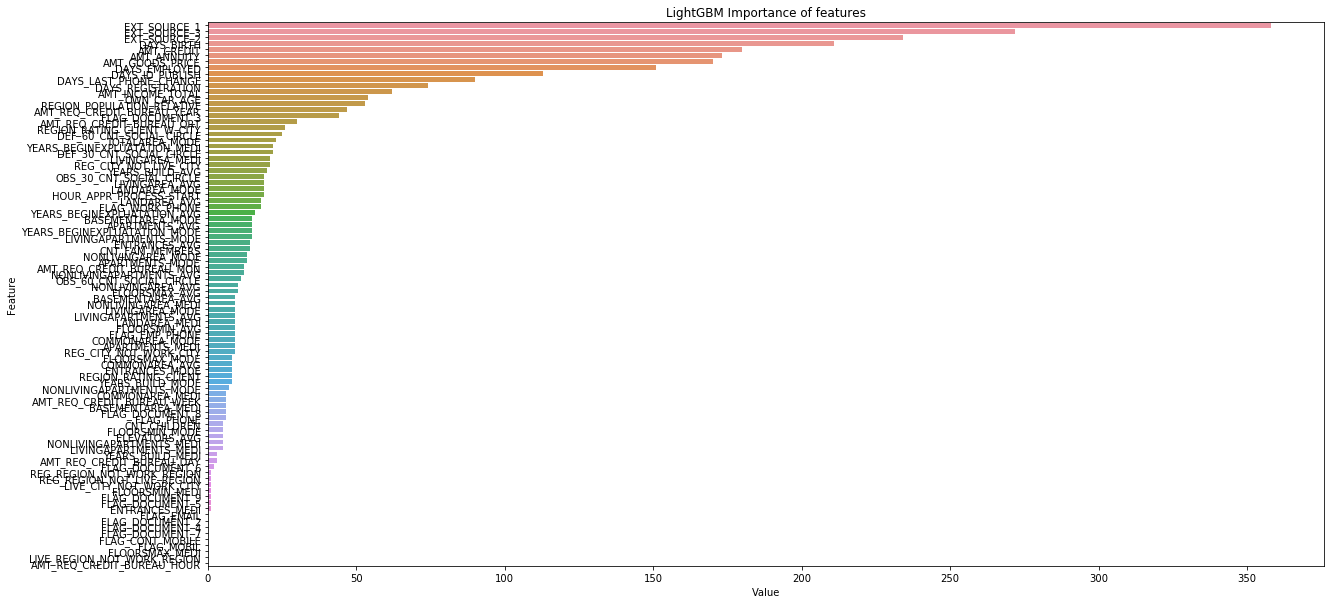

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

implgbm = pd.DataFrame(sorted(zip(bestlgb.feature_importances_, datar.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=implgbm.sort_values(by="Value", ascending=False))
plt.title('LightGBM Importance of features')
plt.show()

In [212]:
forcattr = ftr.copy()
forcatte = fte.copy()
for x in implgbm[implgbm['Value'] < 50]['Feature']:
    ftr.drop(x, axis = 1, inplace=True)
    fte.drop(x, axis = 1, inplace=True)

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ftr = scaler.fit_transform(ftr)
fte = scaler.transform(fte)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [214]:
%%time
bestlgb = lgbm.LGBMClassifier(**gscvl.best_params_)
bestlgb.fit(ftr, yr_train)

Wall time: 1.06 s


In [215]:
ylgbestnew = bestlgb.predict_proba(fte)[:, 1]

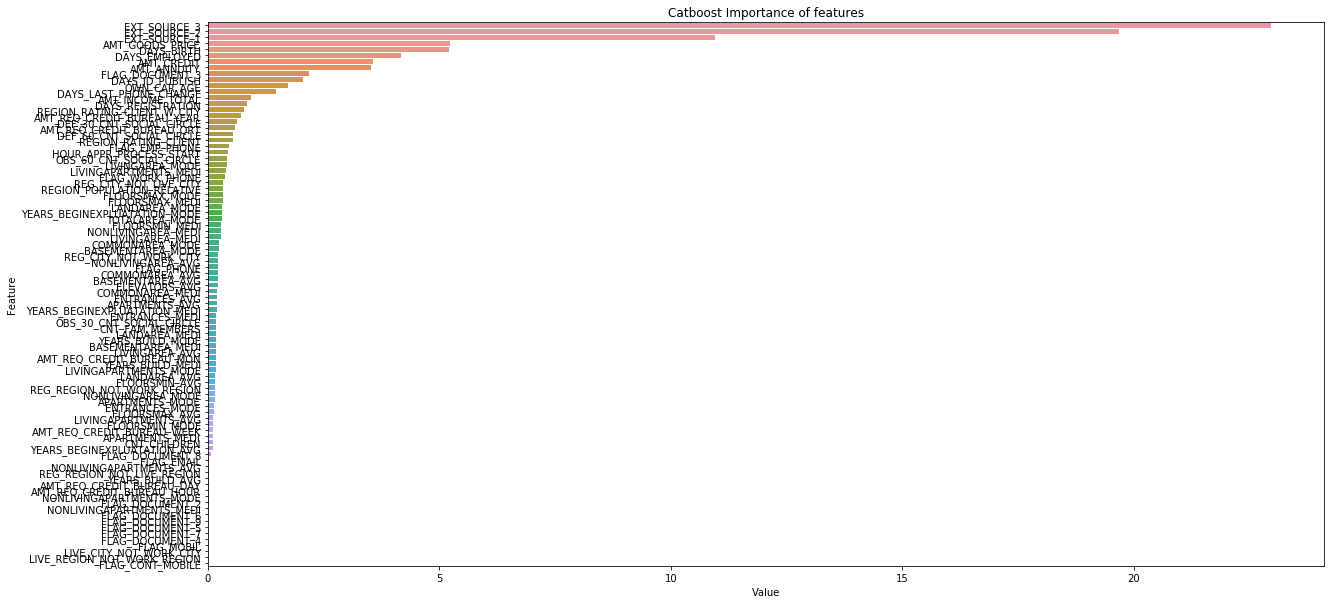

In [216]:
from multiprocessing import Pool
impcatb = pd.DataFrame(sorted(zip(bestcatb.feature_importances_, datar.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=impcatb.sort_values(by="Value", ascending=False))
plt.title('Catboost Importance of features')
plt.show()

In [217]:
for x in impcatb[impcatb['Value'] < 4]['Feature']:
    forcattr.drop(x, axis = 1, inplace=True)
    forcatte.drop(x, axis = 1, inplace=True)

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
forcattr = scaler.fit_transform(forcattr)
forcatte = scaler.transform(forcatte)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [219]:
%%time
bestcatb = cat.CatBoostClassifier(silent = True, **gscvc.best_params_)
bestcatb.fit(forcattr, yr_train)

Wall time: 11.2 s


In [220]:
ycatbestnew = bestcatb.predict_proba(forcatte)[:, 1]

In [221]:
print('LGBM :', 'before drops :', average_precision_score(yr_test, ylgbest), 'after :',average_precision_score(yr_test, ylgbestnew))
print('Catboost :', 'before drops :', average_precision_score(yr_test, ycatbest), 'after :',average_precision_score(yr_test, ycatbestnew))

LGBM : before drops : 0.2298167536285744 after : 0.22625186710676515
Catboost : before drops : 0.22513979446884075 after : 0.2129181040681164


Как видно, качество падает, но совсем незаметно( + стоит отметить что у Catboost оценка упала гораздо сильнее если сравнивать с разницей у LGBM)

__Задание 7. (0.001 балла)__

Приложите ссылку на любимое короткое видео на YouTube, чтобы поднять проверяющему настроение.

https://www.youtube.com/watch?v=_LhDRHRq-Es